*Brian Blaylock*  
*September 12, 2018*

# HRRR Lightning Threat

The HRRR Lightning field `LTNG` is the _Hourly Max lightning threat 3 based on a combination of threats 1 and 2_. It represents the entire atmosphere, and has units flashes/km^2/5min.

Threat 1 is _Hourly Max lightning threat 1 based on vertical flux of graupel at -15C_  
Threat 2 is _Hourly Max lightning threat 2 based on vertical integrated frozen hydrometeors_

([GRIB Table](https://rapidrefresh.noaa.gov/hrrr/GRIB2Table_hrrr_2d.txt))

---

Since the value is an hourly max, there are no values at F00. Must use F01 or greater.


In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_HRRR.HRRR_lightning import accumulate_HRRR_lightning
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
m = draw_HRRR_map()
mm = draw_centermap(lat=40, lon=-115, size=(10,10))

In [3]:
validDATE = datetime(2018, 9, 12, 19)
fxx = 1

runDATE = validDATE - timedelta(hours=fxx)
H = get_hrrr_variable(runDATE, 'LTNG:entire', fxx=fxx) 

masked = H['value']
masked = np.ma.array(masked)
masked[masked <= 0.02] = np.ma.masked


 >> Dowloading tempfile: ./temp_hrrr_2018091218_f01_LTN.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180912/hrrr.t18z.wrfsfcf01.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180912/hrrr.t18z.wrfsfcf01.grib2.idx
 >> Matched a variable:  54:31227984:d=2018091218:LTNG:entire atmosphere:1 hour fcst:
 >> Byte Range: 31227984 31267233


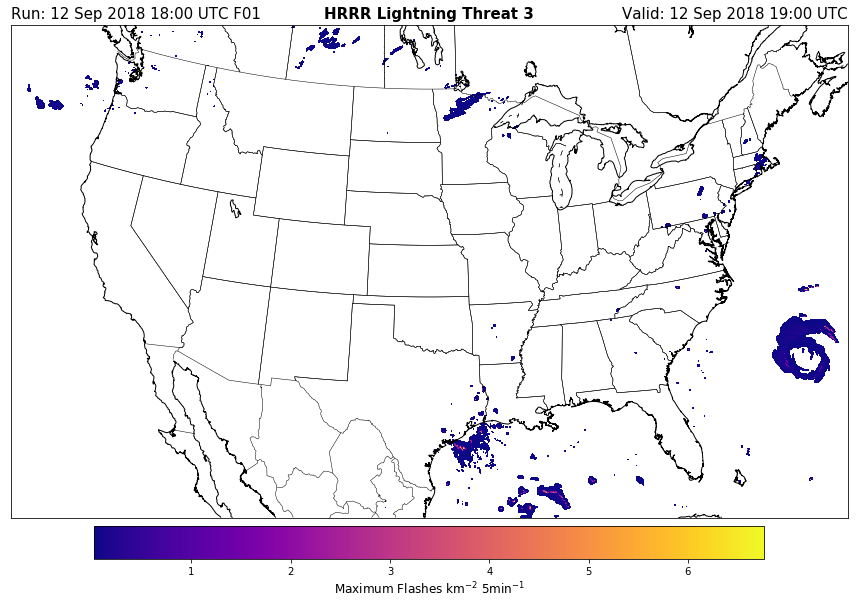

In [4]:
plt.figure(figsize=[15,15])
m.pcolormesh(H['lon'], H['lat'], masked, cmap='plasma', latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label(r'Maximum Flashes km$\mathregular{^{-2}}$ 5min$\mathregular{^{-1}}$')

m.drawcoastlines()
m.drawcountries()
m.drawstates()


plt.title('HRRR Lightning Threat 3', fontweight='semibold');
plt.title('Run: %s F%02d' % (H['anlys'].strftime('%d %b %Y %H:%M UTC'), fxx), loc='left');
plt.title('Valid: %s' % H['valid'].strftime('%d %b %Y %H:%M UTC'), loc='right');

Accumulated Lightning Threat

In [13]:
sDATE = datetime(2018, 5, 8)
eDATE = datetime(2018, 9, 8)
fxx=1
accum_lightning = accumulate_HRRR_lightning(sDATE, eDATE, fxx=fxx)

Start Date : 2018-05-08 00:00:00
End Date   : 2018-09-08 00:00:00
FXX        : 1


In [14]:
maskedA = accum_lightning
maskedA = np.ma.array(maskedA)
maskedA[maskedA <= 0.02] = np.ma.masked

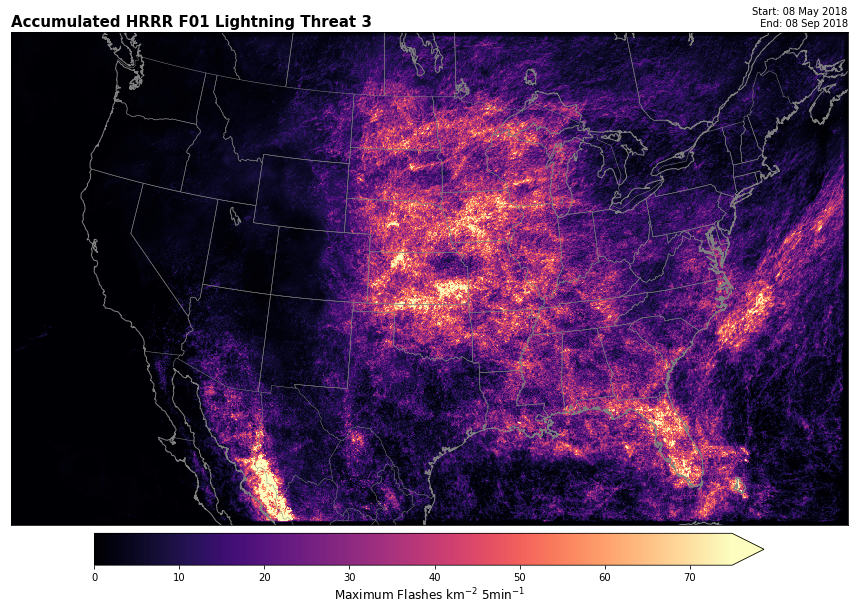

In [15]:
m.pcolormesh(H['lon'], H['lat'], accum_lightning, cmap='magma', latlon=True, vmax=75)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8, extend='max')
cb.set_label(r'Maximum Flashes km$\mathregular{^{-2}}$ 5min$\mathregular{^{-1}}$')

m.drawcoastlines(color='grey')
m.drawcountries(color='grey')
m.drawstates(color='grey')


plt.title('Accumulated HRRR F%02d Lightning Threat 3' % fxx, loc='left', fontweight='semibold');
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10);

plt.savefig('figs/HRRR_F%02d_accumulated_lightning_threat_CONUS' % fxx)

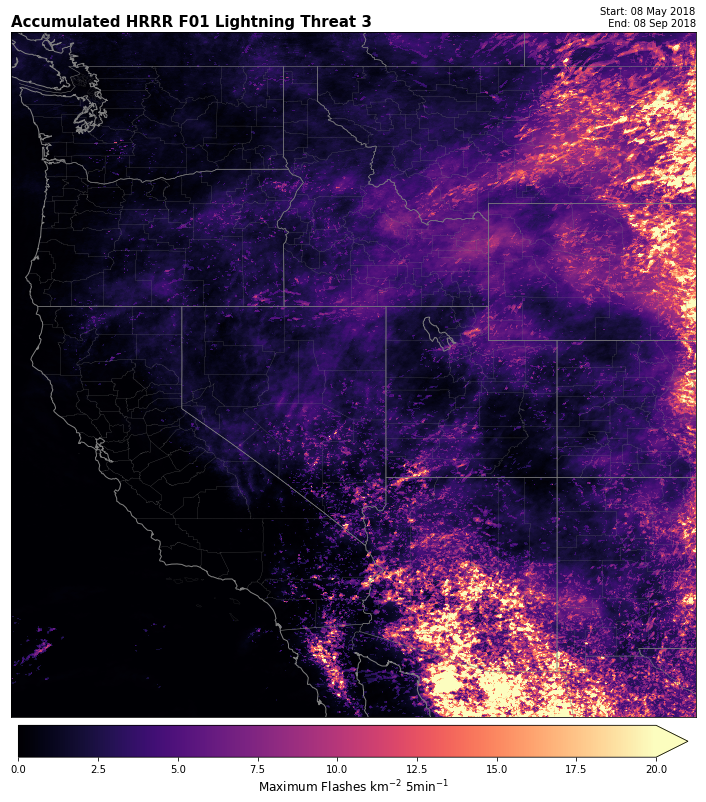

In [16]:
mm.pcolormesh(H['lon'], H['lat'], accum_lightning, cmap='magma', latlon=True, vmax=20)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8, extend='max')
cb.set_label(r'Maximum Flashes km$\mathregular{^{-2}}$ 5min$\mathregular{^{-1}}$')

mm.drawcoastlines(color='grey')
mm.drawcountries(color='grey')
mm.drawstates(color='grey')
mm.drawcounties(color='grey')

plt.title('Accumulated HRRR F%02d Lightning Threat 3' % fxx, loc='left', fontweight='semibold');
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10);

plt.savefig('figs/HRRR_F%02d_accumulated_lightning_threat_WEST' % fxx)

In [9]:
import gc


In [10]:
gc.collect()

2201